In [77]:
#importo la libreria pandas, inserisco il percorso del file e  il dataframe creando variabile del dataframe che chiamo = covid.
import pandas as pd

file_path = "owid-covid-data.csv"
covid = pd.read_csv(file_path)





In [2]:
#ESERCIZIO 1: SI RICHIEDE DI VERIFICARE LE DIMENSIONI DEL DATASET E I RELATIVI METADATI

In [3]:
#Verifico le dimensioni delle colonne_dataset
covid.shape
#il risultato mi restituisce il numero delle righe e dopo la virgola il numero delle colonne

(429435, 67)

In [24]:
#Verifico i metadati
covid.info


<bound method DataFrame.info of        continent  total_cases
0           Asia          0.0
1           Asia          0.0
2           Asia          0.0
3           Asia          0.0
4           Asia          0.0
...          ...          ...
429430    Africa     266386.0
429431    Africa     266386.0
429432    Africa     266386.0
429433    Africa     266386.0
429434    Africa     266386.0

[429435 rows x 2 columns]>

In [26]:
covid.describe

<bound method NDFrame.describe of        continent  total_cases
0           Asia          0.0
1           Asia          0.0
2           Asia          0.0
3           Asia          0.0
4           Asia          0.0
...          ...          ...
429430    Africa     266386.0
429431    Africa     266386.0
429432    Africa     266386.0
429433    Africa     266386.0
429434    Africa     266386.0

[429435 rows x 2 columns]>

In [60]:
#ESERCIZIO 2 - TROVARE PER OGNI CONTINENTE IL NUMERO DI CASI FIN DALL'INIZIO DELLA PANDEMIA E LA PERCENTUALE RISPETTO AL TOT DEL N. DI CASI


#Filtro le colonne rilevanti
colonne_rilevanti = ['continent', 'total_cases']
covid = covid[colonne_rilevanti]

# Rimuovo i dati con valori mancanti 
rimozione_dati_mancanti = covid.dropna(subset=['continent', 'total_cases'])

# Calcolo il numero totale di casi per ogni continente
casi_totali_continente = rimozione_dati_mancanti.groupby('continent')['total_cases'].max()

# Calcolo il totale mondiale dei casi
casi_totali_pandemia = casi_totali_continente.sum()

# Calcolo la percentuale dei casi per ogni continente
percentuale_sul_tot_casi = (casi_totali_continente  / casi_totali_pandemia) * 100

# Stampo i risultati
print("Numero totale di casi per continente:")
print(casi_totali_continente)
print("\nPercentuale di casi rispetto al totale mondiale:")
print(percentuale_sul_tot_casi)


Numero totale di casi per continente:
continent
Africa             4072765.0
Asia              99373219.0
Europe            38997490.0
North America    103436829.0
Oceania           11861161.0
South America     37511921.0
Name: total_cases, dtype: float64

Percentuale di casi rispetto al totale mondiale:
continent
Africa            1.379413
Asia             33.656928
Europe           13.208143
North America    35.033241
Oceania           4.017282
South America    12.704993
Name: total_cases, dtype: float64


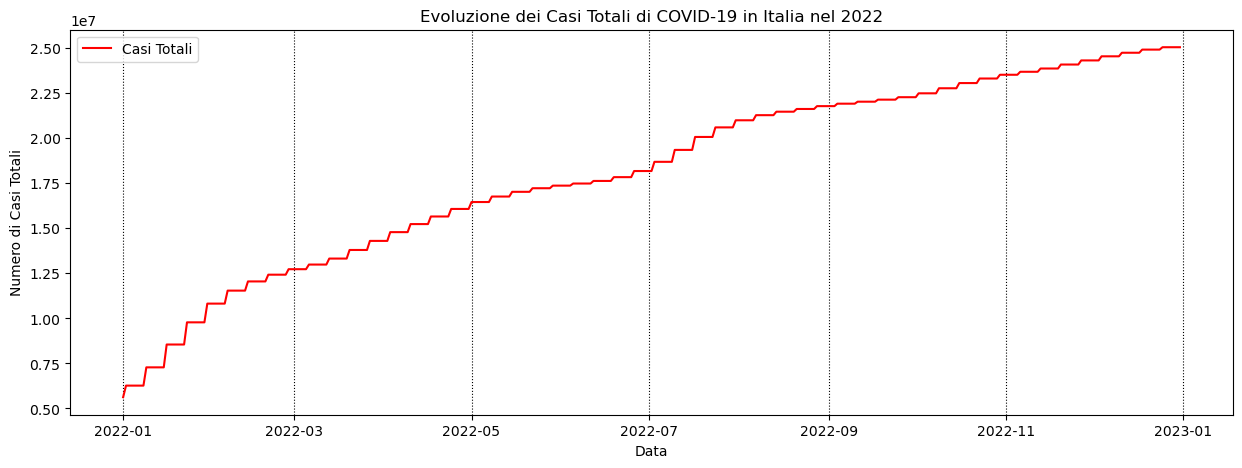

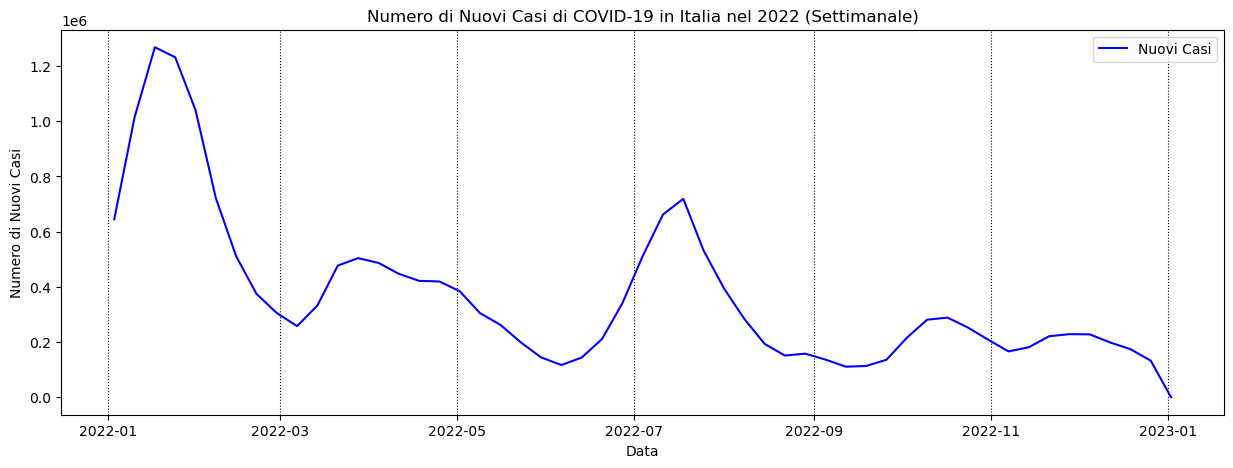

In [16]:
#ESERCIZIO 3 - SELEZIONARE DATI RELATIVI ALL'ITALIA NEL 2022 E MOSTRARE CON DEI GRAFICI,
            # L'EVOLUZIONE DEI CASI DOTALI DALL'INIZIO ALLA FINE DEL 2022 E IL NUMERO DI NUOVI CASI RISPETTO ALLA DATA -


# Ho applicato dei filtri per ottenere le date relative all'anno 2022 in italia 
covid['date'] = pd.to_datetime(covid['date'])
italia_2022 = covid[(covid['location'] == 'Italy') & (covid['date'].dt.year == 2022)]

# poiché i nuovi casi vengono registrati settimanalmente, ho filtrato via i dati che non hanno misurazioni,

italia_2022 = italia_2022.dropna(subset=['new_cases', 'total_cases'])

# ho creato un grafico a linea riguardante l'evoluzione dei casi totali dall'inizio alla fine dell'anno
#ho personalizzato il grafico e la griglia:
plt.figure(figsize=(15, 5))
plt.plot(italia_2022['date'], italia_2022['total_cases'], label='Casi Totali', color='Red')
plt.title('Evoluzione dei Casi Totali di COVID-19 in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Numero di Casi Totali')
plt.legend()
plt.grid(axis='x', linestyle=':', color='black',  linewidth=0.8)
plt.show()


# Ho raggruppato per settimana e calcolato la somma settimanale per i nuovi casi
italia_per_week = italia_2022.resample('W-Mon', on='date').sum().reset_index().sort_values('date')

# Ho creato un grafico a linea riguardante il numero di nuovi casi rispetto alla data, 
#ho personalizzato il grafico e la griglia.
plt.figure(figsize=(15, 5))
plt.plot(italia_per_week['date'], italia_per_week['new_cases'], label='Nuovi Casi', color='Blue')
plt.title('Numero di Nuovi Casi di COVID-19 in Italia nel 2022 (Settimanale)')
plt.xlabel('Data')
plt.ylabel('Numero di Nuovi Casi')
plt.grid(axis='x', linestyle=':', color='black',  linewidth=0.8)
plt.legend()
plt.show()


In [ ]:
#ESERCIZIO 4: Riguardo le nazioni di Italia, Germania e Francia mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) 
#da maggio 2022 (incluso) ad aprile 2023 (incluso)

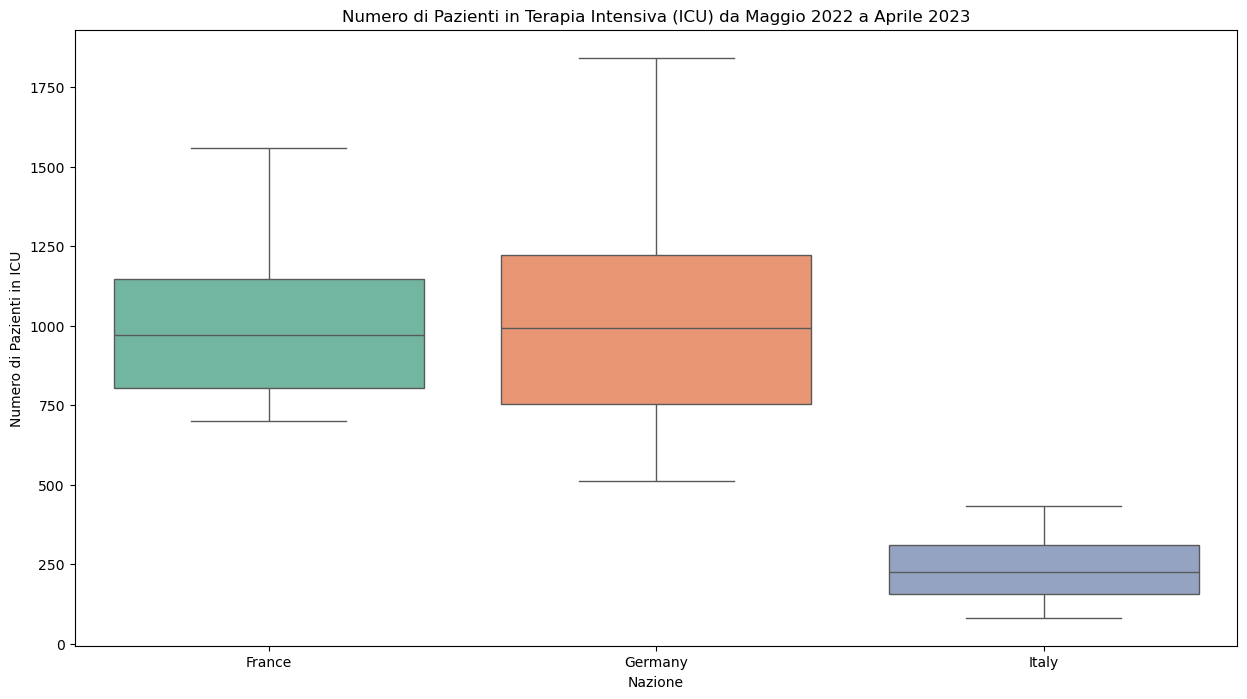

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = "owid-covid-data.csv"
covid = pd.read_csv(file_path)

# Filtro i dati per il periodo da maggio 2022 ad aprile 2023

covid = covid[covid['date'].between('2022-05-01', '2023-04-30')]
# Filtro i dati per Italia, Germania e Francia
covid_icu = covid.query("location in ['Italy', 'Germany', 'France']")

#Ho creato il grafico boxplot
plt.figure(figsize = (15, 8))
sns.boxplot(x ='location', y ='icu_patients', data = covid_icu, hue = "location", palette = "Set2")
plt.title('Numero di Pazienti in Terapia Intensiva (ICU) da Maggio 2022 a Aprile 2023')
plt.xlabel('Nazione')
plt.ylabel('Numero di Pazienti in ICU')
plt.show()

#COMMENTO:
#In questo grafico si evidenzia come l'Italia abbia avuto un numero di pazienti in terapia intensiva più stabile,
#mentre la Germania e la Francia hanno mostrato più variazioni (con giorni di numeri alti e giorni di numeri più bassi di ricoveri).


In [ ]:
#ESERCIZIO 5: Rriguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2023:
#mostrare la somma dei pazienti ospitalizzati per ogni nazione, se ci sono dati nulli, 
#scrivere se puo essere possibile gestirli tramite sostituzione o meno

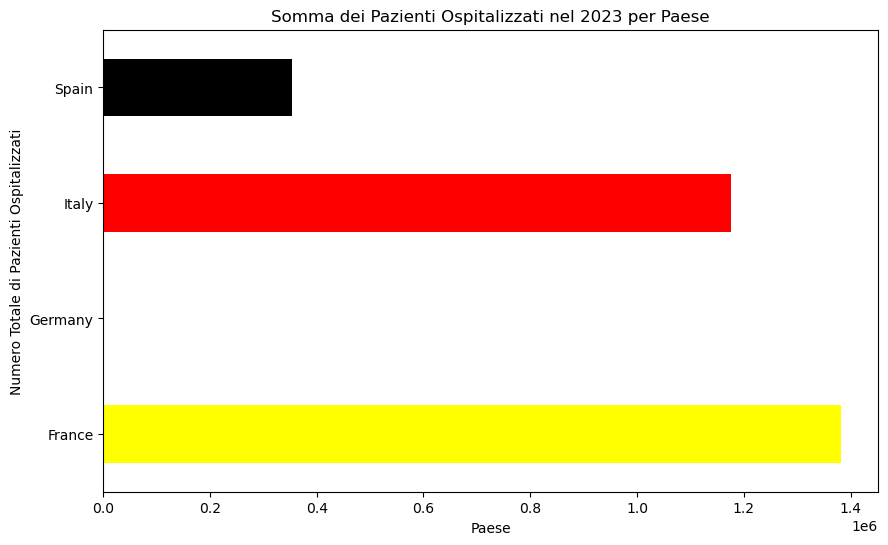

location
France     1382574.0
Germany          0.0
Italy      1175272.0
Spain       354602.0
Name: hosp_patients, dtype: float64


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "owid-covid-data.csv"
covid = pd.read_csv(file_path)

# verifico se la colonna 'date' se è in formato datetime
covid['date'] = pd.to_datetime(covid['date'])

# Filtro i dati per l'anno 2023
covid_2023 = covid[covid['date'].dt.year == 2023]

# Filtro i dati per i paesi in questione
paesi = ['Italy', 'Germany', 'France', 'Spain']
filtro_covid = covid_2023[covid_2023['location'].isin(paesi)]
filtro_covid.loc[filtro_covid['hosp_patients'].isnull(), 'hosp_patients'] = 0

# Calcolo la somma dei pazienti ospitalizzati per ogni paese
ospitalizzati = filtro_covid.groupby('location')['hosp_patients'].sum()

#aggiungo un filtro alle barre 
colori_barre = ["yellow", "blue", "red", "black"]
# Visualizzo i dati creando un grafico a barre orizzontali
ospitalizzati.plot(kind='barh', figsize=(10, 6), color=colori_barre)
plt.title('Somma dei Pazienti Ospitalizzati nel 2023 per Paese')
plt.xlabel('Paese')
plt.ylabel('Numero Totale di Pazienti Ospitalizzati')
plt.show()
print(ospitalizzati)
#COMMENTO
#Nel dataset analizzato, i dati relativi ai pazienti ospitalizzati in Germania nel 2023, sono nulli!
#probabilmente, in assenza di dati certi, i nulli sono stati gestiti e quindi sostituiti con il numero 0.


In [104]:
num_nulls = covid_filtri['hosp_patients'].isnull().sum()
print(f"Numero di valori nulli in 'hosp_patients': {num_nulls}")


Numero di valori nulli in 'hosp_patients': 0


Numero di valori nulli in 'weekly_hosp_admissions': 665


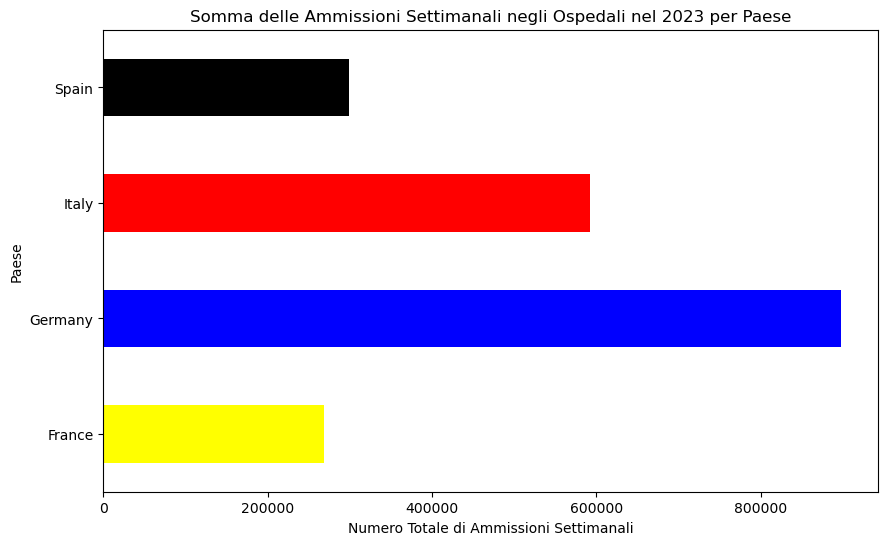

location
France     268117.0
Germany    897776.0
Italy      592019.0
Spain      299463.0
Name: weekly_hosp_admissions, dtype: float64


In [3]:


# Filtro i dati per l'anno 2023
covid_2023 = covid[covid['date'].dt.year == 2023]
paesi = ['Italy', 'Germany', 'France', 'Spain']
filtro_covid = covid_2023[covid_2023['location'].isin(paesi)]

# vediamo se ci sono valori nulli nella colonna 'weekly_hosp_admissions'
nulli = filtro_covid['weekly_hosp_admissions'].isnull().sum()
print(f"Numero di valori nulli in 'weekly_hosp_admissions': {nulli}")


# Calcolo la somma dei pazienti ricoverati settimanalmente per ogni paese
ricoveri_settimanali = filtro_covid.groupby('location')['weekly_hosp_admissions'].sum()

# Aggiungo un filtro alle barre
colori_barre = ["yellow", "blue", "red", "black"]

# Visualizzo i dati creando un grafico a barre orizzontali
ricoveri_settimanali.plot(kind='barh', figsize=(10, 6), color=colori_barre)
plt.title('Somma delle Ammissioni Settimanali negli Ospedali nel 2023 per Paese')
plt.xlabel('Numero Totale di Ammissioni Settimanali')
plt.ylabel('Paese')
plt.show()

# Stampa il risultato
print(ricoveri_settimanali)
